In [98]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [99]:
dataset = pd.read_csv("../input/titanic/train.csv")
datatest = pd.read_csv("../input/titanic/test.csv")

In [100]:
dataset.shape

(891, 12)

In [101]:
datatest.shape

(418, 11)

In [102]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
# replace gender objects with integers

dataset['Sex'] = dataset['Sex'].apply({"male":1, "female":0}.get)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

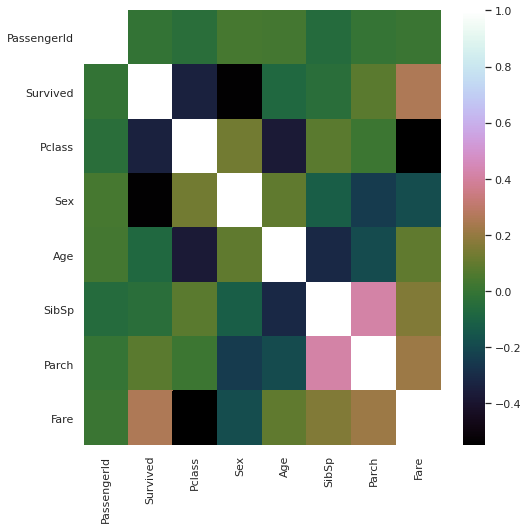

In [107]:
# corr matrix

fig, ax = plt.subplots(figsize=(8,8))

corr = dataset.corr()

sns.heatmap(corr, cmap='cubehelix', ax = ax)

# => there is a strong correlation between Survived & Pclass/Fare and between Survived & Sex

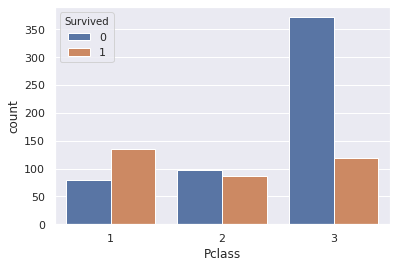

In [108]:
sns.set(style='darkgrid')
sns.countplot(data=dataset, x='Pclass', hue='Survived')

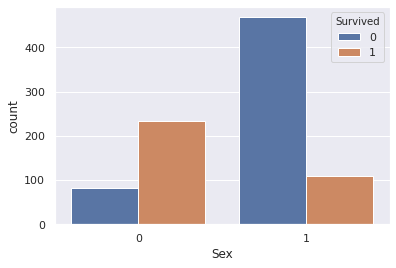

In [109]:
sns.set(style='darkgrid')
sns.countplot(data=dataset, x='Sex', hue='Survived')

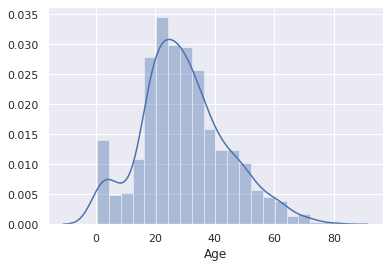

In [110]:
sns.distplot(dataset['Age'], hist=True)

<function matplotlib.pyplot.show(*args, **kw)>

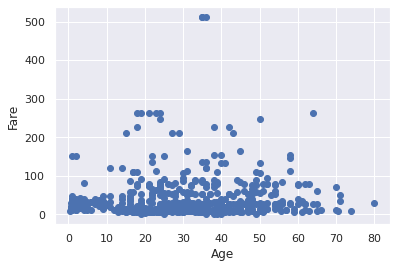

In [111]:
x = dataset['Age']
y = dataset['Fare']

plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show

In [112]:
dataset.loc[dataset['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,B101,C


In [113]:
# apply knn model

dataset1=dataset.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)
dataset1=dataset1.fillna(dataset.mean())

In [114]:
print(len(dataset1['Age']))

891


In [115]:
dataset1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
# standard scaler, train-test split, accuracy score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

model = KNeighborsClassifier(n_neighbors=27)
features = dataset1.drop(columns=['Survived'])
label = dataset1['Survived']

scaler = StandardScaler()
features_scaled = scaler.fit(features)
features_scaled = scaler.transform(features)

x_train, x_test, y_train, y_test = train_test_split(features_scaled, label, test_size=0.3)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))

0.835820895522388


In [117]:
# apply random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8470149253731343


In [118]:
# compare these results to a foolish predicator that use only Pclass for prediction (Pclass 3 = not survived, Pclass 1 or 2 = survived)

pclass_predicator = []
for x in dataset['Pclass']:
    if x == 3:
      pclass_predicator.append(0)
    else:
       pclass_predicator.append(1)

num_of_truth = 0
for a,b in zip(pclass_predicator, dataset['Survived']):
    if a == b:
        num_of_truth += 1

accuracy_pclass_based_predicator = num_of_truth / 891
print(accuracy_pclass_based_predicator)

# => random forest classifier do a good job compare to Pclass based predicator (84% compare to 66%)

0.6677890011223344


In [119]:
# Doing the same with gender foolish predicator (male = not survived, female = survived)

gender_predicator = []
for x in dataset['Sex']:
    if x == 0:
      gender_predicator.append(1)
    else:
       gender_predicator.append(0)

num_of_truth = 0
for a,b in zip(gender_predicator, dataset['Survived']):
    if a == b:
        num_of_truth += 1

accuracy_gender_based_predicator = num_of_truth / 891
print(accuracy_gender_based_predicator)

# => but here the results of the foolish predicator is much better

0.7867564534231201


In [120]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7734806629834255

In [121]:
# apply logistic regression classifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(random_state=0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [122]:
print(model.predict(x_train))

[0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

In [123]:
print(model.predict_proba(x_train))

[[0.89289129 0.10710871]
 [0.55019998 0.44980002]
 [0.8817422  0.1182578 ]
 ...
 [0.55678271 0.44321729]
 [0.04718196 0.95281804]
 [0.10942327 0.89057673]]


In [124]:
model.score(x_train, y_train)

0.7865168539325843

In [125]:
# Create new feature that separate gender to Miss. & Mrs.

In [126]:
# clean the 'Name' column

import re

def clean(col):
    cleans = []
    for s in col:
        c = re.sub(r'[^\w\s]','',s)
        cleans.append(c)
    return cleans

dataset['Name'] = clean(dataset['Name'])

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen Mr William Henry,1,35.0,0,0,373450,8.0500,NaN,S


In [127]:
dataset["namesplit"] = dataset.iloc[:,3].str.split()

In [128]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,namesplit
0,1,0,3,Braund Mr Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr, Owen, Harris]"
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,0,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs, John, Bradley, Florence, Briggs..."
2,3,1,3,Heikkinen Miss Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss, Laina]"
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,0,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs, Jacques, Heath, Lily, May, Peel]"
4,5,0,3,Allen Mr William Henry,1,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr, William, Henry]"


In [129]:
dataset["Mrs/Miss/Mr"] = 0
for i, name in enumerate(dataset["namesplit"]):
    if "Mrs" in name:
        continue
    elif "Miss" in name:
         dataset["Mrs/Miss/Mr"][i] += 1
    else:
        dataset["Mrs/Miss/Mr"][i] += 2 
             
dataset.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,namesplit,Mrs/Miss/Mr
0,1,0,3,Braund Mr Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr, Owen, Harris]",2
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,0,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs, John, Bradley, Florence, Briggs...",0
2,3,1,3,Heikkinen Miss Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss, Laina]",1
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,0,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs, Jacques, Heath, Lily, May, Peel]",0
4,5,0,3,Allen Mr William Henry,1,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr, William, Henry]",2


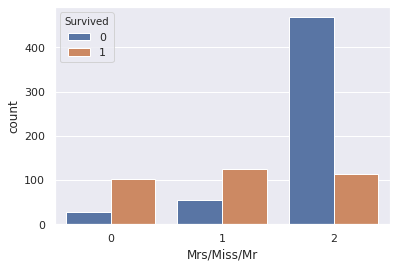

In [130]:
sns.set(style='darkgrid')
sns.countplot(data=dataset, x='Mrs/Miss/Mr', hue='Survived')

In [131]:
#apply randomforestregressor to the new dataset

dataset2 = dataset.drop(['Name','namesplit', 'Ticket', 'Cabin', 'Embarked', 'Sex'],axis=1)
dataset2=dataset2.fillna(dataset.mean())

features = dataset2.drop(columns=['Survived'])
label = dataset2['Survived']

scaler = StandardScaler()
features_scaled = scaler.fit(features)
features_scaled = scaler.transform(features)

x_train, x_test, y_train, y_test = train_test_split(features_scaled, label, test_size=0.3)

dataset2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Mrs/Miss/Mr
0,1,0,3,22.0,1,0,7.2500,2
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,2


In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8507462686567164


In [133]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 7)
(268, 7)
(623,)
(268,)


In [134]:
# apply CNN to dataset2

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(623, 2)
(268, 2)


In [135]:
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv1D, Dropout


x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
num_classes = 2

model = Sequential()
model.add(Conv1D(20, kernel_size=4,
                 activation='relu',
                 input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(20, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
          batch_size=10,
          epochs=100,
          validation_data = (x_test, y_test))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 4, 20)             100       
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 1, 20)             1620      
_________________________________________________________________
flatten_14 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               2688      
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 258       
Total params: 4,666
Trainable params: 4,666
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6335 - accuracy: 0.6597 - val_loss: 0.5308

63/63 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8475 - val_loss: 0.4874 - val_accuracy: 0.8321
Epoch 52/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8539 - val_loss: 0.4540 - val_accuracy: 0.8284
Epoch 53/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8459 - val_loss: 0.4778 - val_accuracy: 0.8284
Epoch 54/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8523 - val_loss: 0.5103 - val_accuracy: 0.8246
Epoch 55/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8523 - val_loss: 0.4820 - val_accuracy: 0.8172
Epoch 56/100
63/63 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8539 - val_loss: 0.4753 - val_accuracy: 0.8246
Epoch 57/100
63/63 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8604 - val_loss: 0.4953 - val_accuracy: 0.8284
Epoch 58/100
63/63 

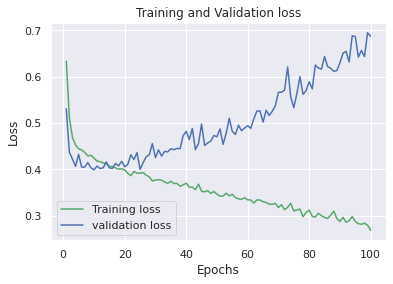

In [136]:
# overfitting illustration

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

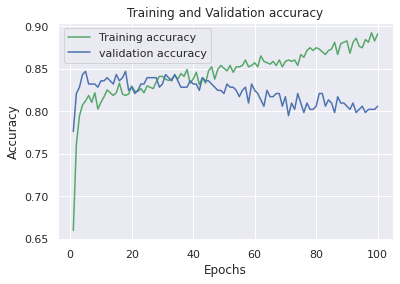

In [137]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [138]:
# implement early stopping to prevent overfitting

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=4)

model = Sequential()
model.add(Conv1D(20, kernel_size=4,
                 activation='relu',
                 input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(20, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
          batch_size=10,
          epochs=100,
          validation_data = (x_test, y_test),
          callbacks=[early_stopping])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 4, 20)             100       
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 1, 20)             1620      
_________________________________________________________________
flatten_15 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               2688      
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 258       
Total params: 4,666
Trainable params: 4,666
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.6453 - val_loss: 0.4981